### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read Files

In [2]:
df = pd.read_csv('uc_comed_two_years_final.csv', header = 'infer')
df.columns

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'METER_ID', u'DATETIME', u'TERM', u'BD_ID', u'CLON', u'CLAT',
       u'DISCRIPT1', u'USAGE', u'SQFT', u'GROUP_ID', u'GROUP_NAME',
       u'LINKED_METERS'],
      dtype='object')

In [3]:
df_temp = pd.read_csv('weather_prepared_final.csv')
df_temp.columns

Index([u'DATE', u'STATION', u'TEMPERATURE', u'HUMIDITY', u'LON', u'LAT'], dtype='object')

### Keeping useful columns and converting date-time

In [4]:
df_new = df.filter(['DATETIME', 'TERM', 'BD_ID', 'DISCRIPT1', 'USAGE'])
df_new['DATETIME'] = pd.to_datetime(df_new['DATETIME'])
df_temp_new = df_temp.filter(['DATE', 'STATION', 'TEMPERATURE', 'HUMIDITY'])
df_temp_new['DATE'] = pd.to_datetime(df_temp_new['DATE'])

### Function to pick data

In [5]:
def get_data(term, building_name, weather_station = 'Regenstein Library Weather Station'):
    ## PICK USAGE DATA BASED ON TERM AND BUILDING_NAME
    usage = df_new[(df_new['TERM'] == term) & (df_new['DISCRIPT1'] == building_name)]
    
    ## GET START AND END DATE OF THE TERM
    start_date = usage.iloc[0]['DATETIME']
    end_date = usage.iloc[-1]['DATETIME']
    
    ## PICK WEATHER STATION FOR TEMP
    df_T = df_temp_new[(df_temp_new['STATION'] == weather_station)]
    
    df_bool1 = (df_temp_new['DATE'] == start_date)
    index1 = df_bool1[df_bool1 == True].index.tolist()[0]
    
    df_bool2 = (df_temp_new['DATE'] == end_date)
    index2 = df_bool2[df_bool2 == True].index.tolist()[0]
    
    try: 
        temp = df_T.loc[index1:index2+1] 
    except:
        temp = df_T.loc[index1:end]
    
    usage_temp = pd.merge(left = usage, right = temp, left_on='DATETIME', right_on = 'DATE', how='left')
    return(usage_temp)

#### values for term, building_name, weather_station below

In [6]:
terms = df_new.TERM.unique()
terms

array(['Winter 2014', nan, 'Spring 2014', 'Summer 2014', 'Autumn 2014',
       'Winter 2015', 'Spring 2015', 'Summer 2015', 'Autumn 2015',
       'Winter 2016'], dtype=object)

In [7]:
building_names = df_new.DISCRIPT1.unique()
building_names

array(['Bernard Mitchell Hospitial', 'John Crerar Library',
       'Steam Plant Power Plant', 'Chapin Hall',
       'Social Science Research Building',
       'Duchossois Center for Advanced Medicine', 'Harris School',
       'Kovler Laboratories', 'Hinds Laboratory',
       'American School Building', 'Cummings Life Sciences Center',
       'Bookstore', 'Laird Bell Law Quadrangle',
       'A.J. Carlson Animal Research Facility', 'Henry Crown Field House',
       'Breckinridge House', 'Chicago Lying-In Hospital',
       'Surgery Brain Research Institude', 'Campus Student Center',
       'Residential', 'Alber Merrit Billings Hospital',
       "Sylvan & Arma Wyler Children's Hospital", 'Walker Museum',
       'Woodlawn Social Service Center', 'Peck Pavilion', 'Pick Hall',
       'University Service Building (ATS)', 'Stagg Field Building',
       'Eckhart Hall', 'Ellis Avenue Parking Strucutre', 'Levi Hall',
       'BSDLC', 'Charles M. Harper Center', 'Stuart Hall', 'Anatomy',
       'New

In [8]:
weather_stations = df_temp_new.STATION.unique()
weather_stations

array(['Bell Weather Station', 'Regenstein Library Weather Station'], dtype=object)

### Select TERM, BUILDING_NAME & Get Dataframe

In [9]:
usage_temp = get_data('Summer 2015', 'Regenstein Library', 'Regenstein Library Weather Station')
usage_temp.columns

Index([u'DATETIME', u'TERM', u'BD_ID', u'DISCRIPT1', u'USAGE', u'DATE',
       u'STATION', u'TEMPERATURE', u'HUMIDITY'],
      dtype='object')

In [10]:
df_merge = usage_temp

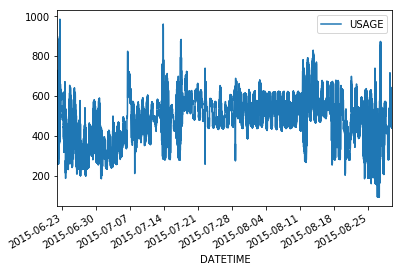

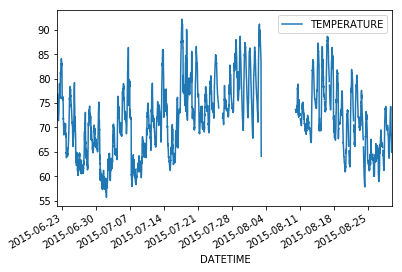

In [11]:
df_merge.plot(x = 'DATETIME', y = 'USAGE')
df_merge.plot(x = 'DATETIME', y = 'TEMPERATURE')

In [12]:
import statsmodels.formula.api as sm
df_merge = df_merge.dropna(subset = ['TEMPERATURE'])
model = sm.OLS(df_merge['USAGE'], df_merge['TEMPERATURE'])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  USAGE   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.088e+05
Date:                Wed, 19 Apr 2017   Prob (F-statistic):               0.00
Time:                        13:58:29   Log-Likelihood:                -35859.
No. Observations:                5842   AIC:                         7.172e+04
Df Residuals:                    5841   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TEMPERATURE     6.7039      0.020    329.777      0.000       6.664       6.744
==============================================================================
Omnibus:                       20.260   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.312
Skew:                          -0.100   Prob(JB):                     1.43e-05
Kurtosis:                       3.227   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df_merge['FIT'] = 6.7039*df_merge['TEMPERATURE']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


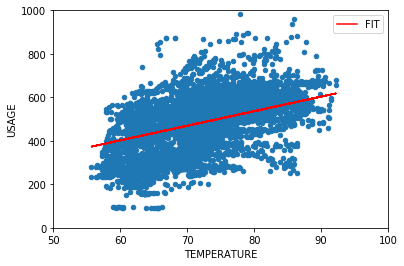

In [14]:
ax = df_merge.plot(x = 'TEMPERATURE', y = 'USAGE', kind='scatter', ylim = [0, 1000], xlim = [50,100])
df_merge.plot(ax = ax, x = 'TEMPERATURE', y = 'FIT', color = 'r', ylim = [0, 1000], xlim = [50,100])